# NBA Shooting Data
This dataset contains shooting statistics for four different players during the 2021 NBA Playoffs.

Not sure where to begin? Scroll to the bottom to find challenges!

In [1]:
import pandas as pd

pd.read_csv("nba_players_shooting.csv", index_col=0)

,SHOOTER,X,Y,RANGE,DEFENDER,SCORE
INDEX,,,,,,
0,Seth Curry,-3.808987,5.583621,"(0, 4)",Chris Paul,MADE
1,Seth Curry,-0.104279,5.919138,"(0, 4)",Trae Young,MADE
2,Seth Curry,-0.525864,8.912239,"(0, 4)",Trae Young,MADE
3,Seth Curry,-0.790616,7.503782,"(0, 4)",Chris Paul,MADE
4,Seth Curry,2.119074,5.320534,"(0, 4)",Trae Young,MADE
...,...,...,...,...,...,...
771,Trae Young,23.952742,15.324875,"(25, 29)",Russell Westbrook,MISSED
772,Trae Young,6.221766,30.756008,"(25, 29)",Seth Curry,MISSED
773,Trae Young,16.397467,27.660323,"(25, 29)",Chris Paul,MISSED


## Data Dictionary
|variable |class     |description                                                  |
|:--------|:---------|:------------------------------------------------------------|
|SHOOTER  |String    |Name of the player taking the shot                           |
|X        |float     |Horizontal distance of the shot taken from the basket in ft  |
|Y        |float     |Vertical distance of the shot taken from the basket in ft    |
|RANGE    |String    |Radius range of the shot taken from the basket in ft         |
|DEFENDER |String    |Name of the player defending the shot                        |
|SCORE    |String    |'MADE' if shot is scored, else 'MISSED'                      |

[Source](https://www.nba.com/stats/players/shooting/?Season=2020-21&SeasonType=Playoffs&PerMode=Totals) of dataset.

## The business case:

A university basketball team has hired you to use data to improve their performance. They want to know whether it's possible to use past data to provide tailored recommendations to players.

As a test, you have been provided with NBA shooting data for four players. The manager of the university team has asked you whether it is possible to provide data-driven recommendations for each player based on their likelihood of making a shot.

You will need to prepare a report that is accessible to a broad audience. It will need to outline your steps, findings, and conclusions.

# I- Exploratory Data Analysis

First, let's explore the data and conduct initial vizualization to understand the data better.

## 1. Import the necessary libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the dataset is in a CSV file named "shooting_data.csv"
data = pd.read_csv("nba_players_shooting.csv", index_col = 0)


## 2. Initial Data Exploration

In this step, we just start by printing the data to see the general layout.

In [3]:
# View the first few rows of the dataset
print("---------------------------------------------")
print("----------- Column Head----------------------")
print(data.head())

# Check the dataset's shape, columns, and data types
print("---------------------------------------------")
print("Data Shape is:")
print(data.shape)
print("---------------------------------------------")
print("Data Column titles are:")
print(data.columns)
print("---------------------------------------------")
print("Columns datatypes are:")
print(data.dtypes)

# Check for missing or null values
print("---------------------------------------------")
print("Missing values check.")
print(data.isnull().sum())


---------------------------------------------
----------- Column Head----------------------
          SHOOTER         X         Y   RANGE    DEFENDER SCORE
INDEX                                                          
0      Seth Curry -3.808987  5.583621  (0, 4)  Chris Paul  MADE
1      Seth Curry -0.104279  5.919138  (0, 4)  Trae Young  MADE
2      Seth Curry -0.525864  8.912239  (0, 4)  Trae Young  MADE
3      Seth Curry -0.790616  7.503782  (0, 4)  Chris Paul  MADE
4      Seth Curry  2.119074  5.320534  (0, 4)  Trae Young  MADE
---------------------------------------------
Data Shape is:
(776, 6)
---------------------------------------------
Data Column titles are:
Index(['SHOOTER', 'X', 'Y', 'RANGE', 'DEFENDER', 'SCORE'], dtype='object')
---------------------------------------------
Columns datatypes are:
SHOOTER      object
X           float64
Y           float64
RANGE        object
DEFENDER     object
SCORE        object
dtype: object
------------------------------------------

We can see that there are no missing values in this data, which means that we do not have to 

## 3. Generate Summart Statistics

In [4]:
# Generate summary statistics for numerical variables
print(data.describe())

# Generate frequency counts for categorical variables
print(data['SHOOTER'].value_counts())
print(data['RANGE'].value_counts())
print(data['DEFENDER'].value_counts())
print(data['SCORE'].value_counts())


                X           Y
count  776.000000  776.000000
mean     0.492154   15.400099
std     12.934870    8.009152
min    -24.856870    5.008911
25%     -8.227266    8.151474
50%      0.318647   13.665261
75%      9.782513   21.175087
max     24.767551   33.853913
Trae Young           329
Chris Paul           216
Seth Curry           147
Russell Westbrook     84
Name: SHOOTER, dtype: int64
(25, 29)    206
(10, 14)    138
(15, 19)    132
(0, 4)      120
(5, 9)       96
(20, 24)     84
Name: RANGE, dtype: int64
Russell Westbrook    232
Chris Paul           197
Seth Curry           191
Trae Young           156
Name: DEFENDER, dtype: int64
MISSED    416
MADE      360
Name: SCORE, dtype: int64


## 4. Visualize the data



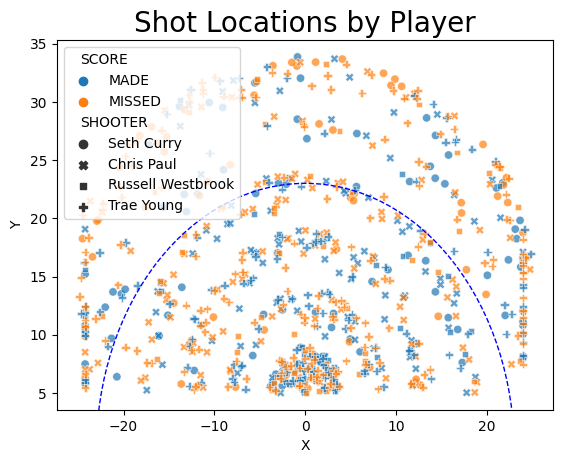

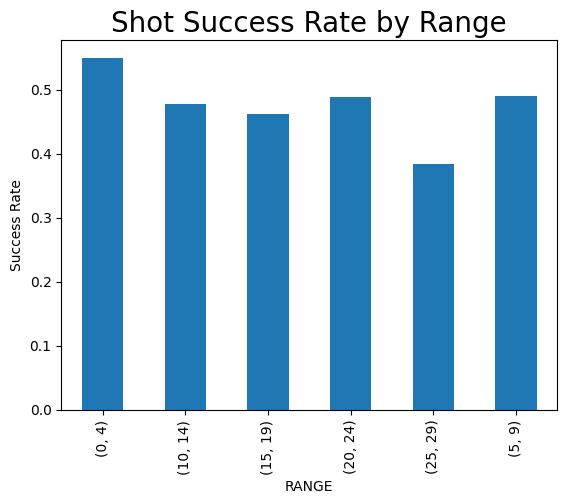

In [5]:
# Shooting patterns: Create scatter plots of shot locations for each player
sns.scatterplot(data=data, x='X', y='Y', hue='SCORE', style='SHOOTER', alpha=0.7)
plt.title('Shot Locations by Player', size = 20)

# Draw the 3-point line
three_point_radius = 23
circle = plt.Circle((0, 0), three_point_radius, color='blue', fill=False, linestyle='--', linewidth=1)
plt.gca().add_artist(circle)

plt.show()

# Shot success by range: Create a bar plot showing shot success rates for each range category
range_success = data.groupby(['RANGE', 'SCORE']).size().unstack()
range_success['Success Rate'] = range_success['MADE'] / (range_success['MADE'] + range_success['MISSED'])
range_success['Success Rate'].plot(kind='bar')
plt.title('Shot Success Rate by Range', size = 20)
plt.ylabel('Success Rate')
plt.show()





# II - Shooting patterns visualization

## 1. Shot visualization by player
At this stage, let's plot the shooting data patterns for each player and compare the patterns obtained.


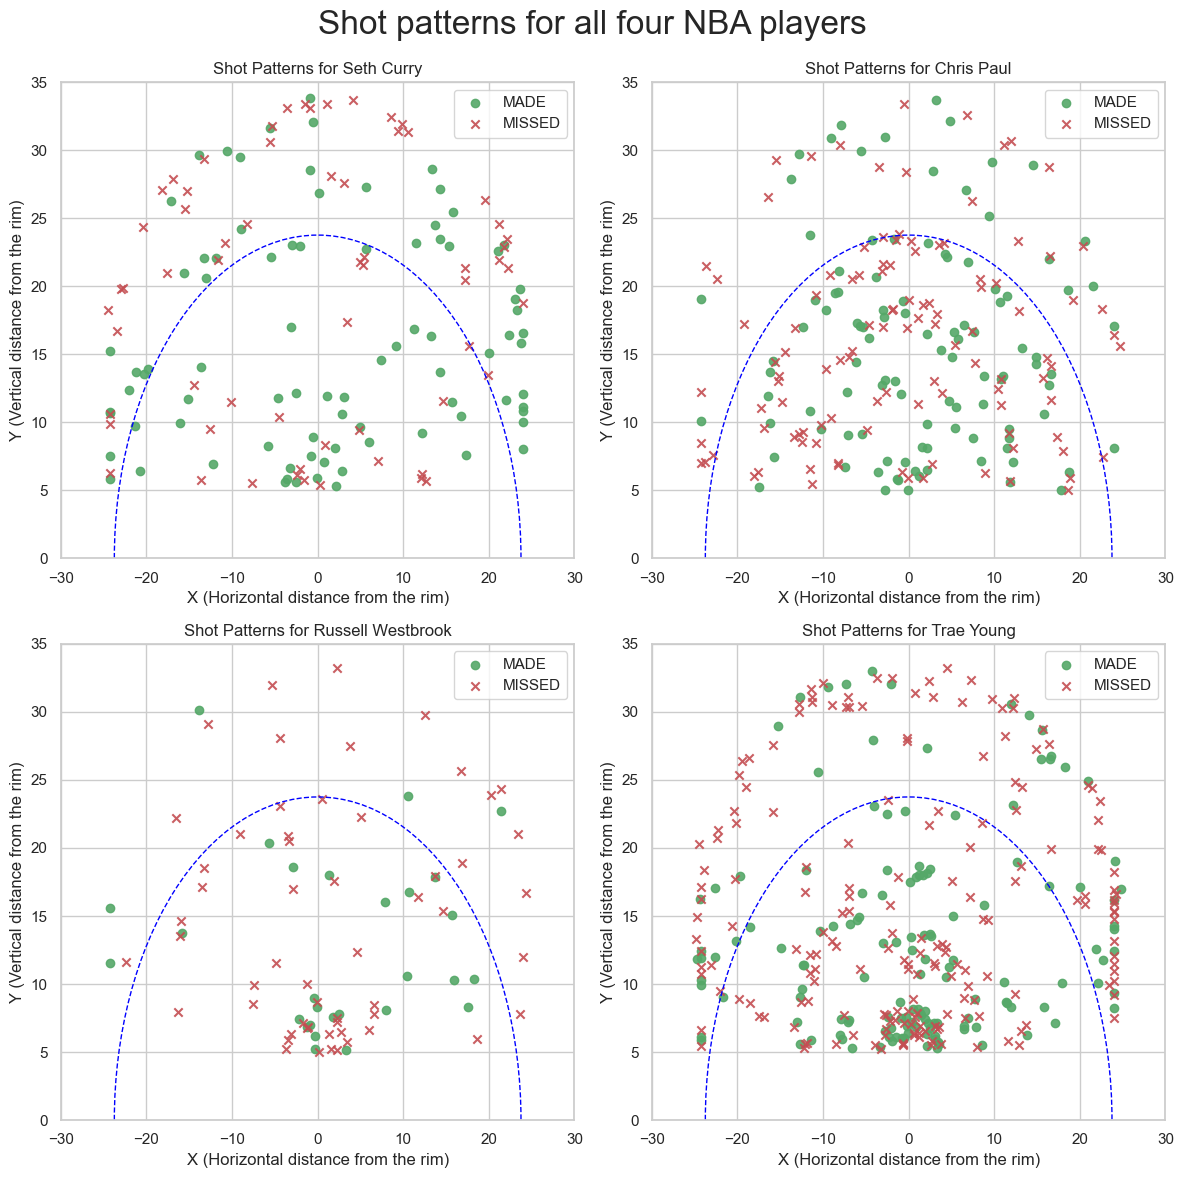

In [6]:
# Set the style for the seaborn plots
sns.set(style="whitegrid")

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))
fig.suptitle('Shot patterns for all four NBA players', fontsize=24)

# Get the unique player names
players = data['SHOOTER'].unique()

# Define the coordinates of the center of the rim
rim_coordinates = (0, 0)

# Define the radius of the 3-point line
three_point_radius = 23.75

# Iterate over the subplots and create a scatter plot for each player
for i, ax in enumerate(axes.flat):
    player_data = data[data['SHOOTER'] == players[i]]
    
    # Separate data for made and missed shots
    made_shots = player_data[player_data['SCORE'] == 'MADE']
    missed_shots = player_data[player_data['SCORE'] == 'MISSED']
    
    # Plot made and missed shots using different markers
    ax.scatter(made_shots['X'], made_shots['Y'], marker='o', c='g', label='MADE', alpha=0.9)
    ax.scatter(missed_shots['X'], missed_shots['Y'], marker='x', c='r', label='MISSED', alpha=0.9)

    # Draw the 3-point line
    circle = plt.Circle(rim_coordinates, three_point_radius, color='blue', fill=False, linestyle='--', linewidth=1)
    ax.add_artist(circle)

    # Set axis limits and labels
    ax.set_xlim(-30, 30)
    ax.set_ylim(0, 35)
    ax.set_title(f"Shot Patterns for {players[i]}")
    ax.set_xlabel('X (Horizontal distance from the rim)')
    ax.set_ylabel('Y (Vertical distance from the rim)')
    ax.legend()

# Optimize the layout and show the plot
fig.tight_layout()
fig.subplots_adjust(top=0.92)
plt.show()


According to the above visualization, we can observe the follwoing:

- Seth Curry, Trae Young and Chris Paul's shots seem to be consistent from everywhere on the court.
- Russel Westbrook's Shot% seem to be consistant.... But in a bad way (Poor Lebron...). He also shoots less (at least in this period covered by the dataset).

## 2. Shot percentage heatmap by player
Next, we will divide the court in quadrants and produce a heatmap to uncover which quadrant works best for the player.

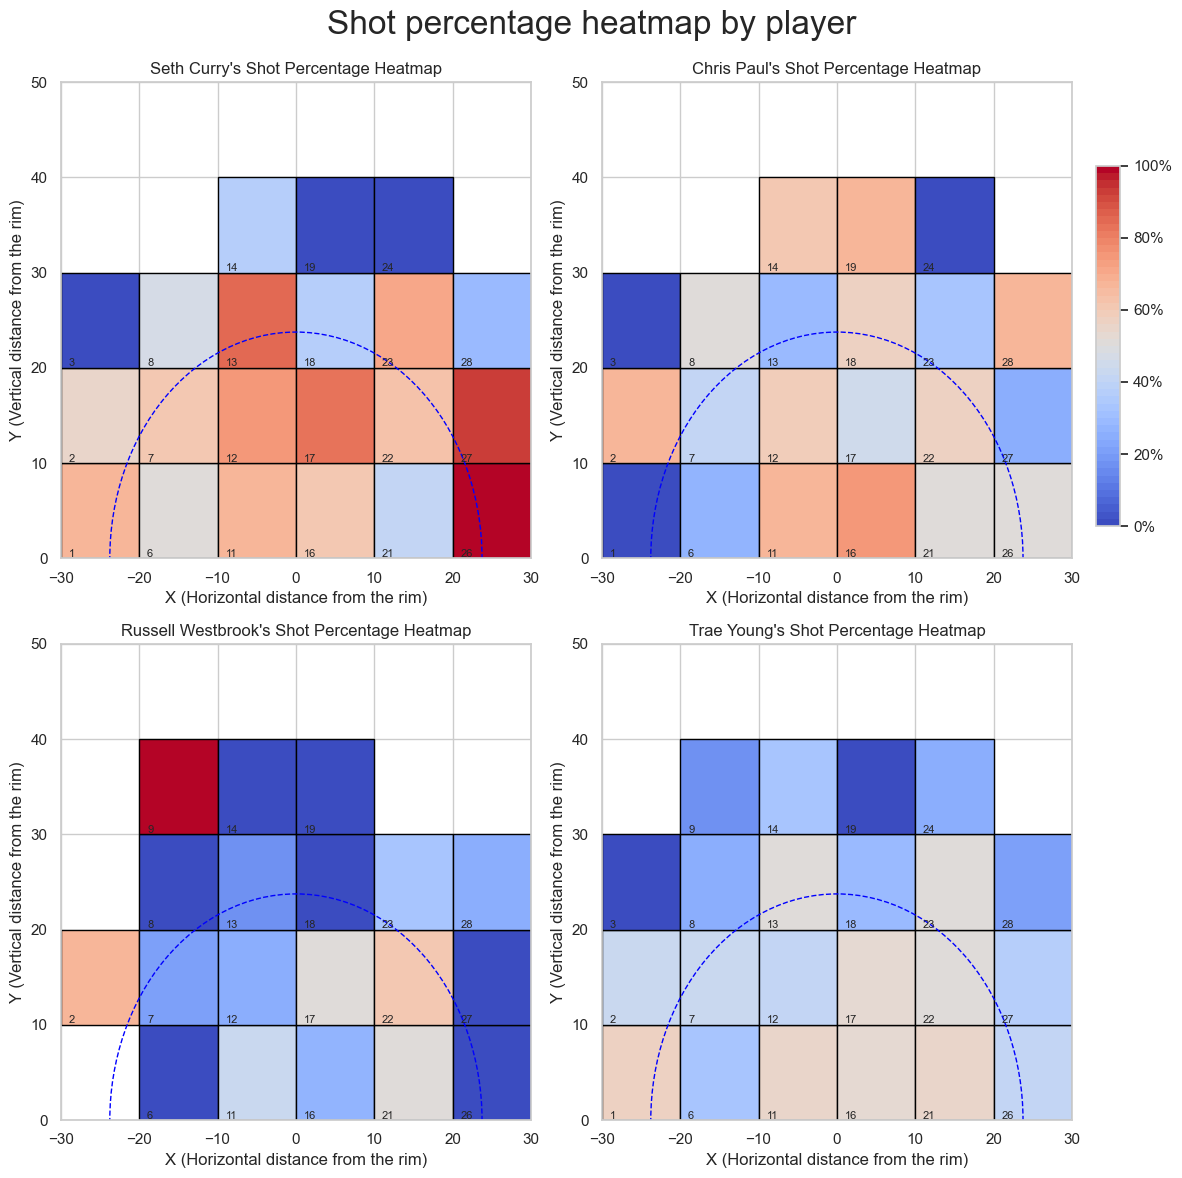

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Step 1: Divide the court into 10x10 quadrants
x_bins = np.linspace(-30, 30, 7)
y_bins = np.linspace(0, 50, 6)
data['X_BIN'] = pd.cut(data['X'], bins=x_bins, labels=False)
data['Y_BIN'] = pd.cut(data['Y'], bins=y_bins, labels=False)

# Step 2: Calculate the shot percentage for each quadrant and player
quad_counts = data.pivot_table(index=['SHOOTER', 'X_BIN', 'Y_BIN'], columns='SCORE', values='DEFENDER', aggfunc='count').fillna(0)
quad_counts['SHOT%'] = quad_counts['MADE'] / (quad_counts['MADE'] + quad_counts['MISSED'])
quad_counts.reset_index(inplace=True)

# Step 3: Create a custom colormap to visualize shot percentages
#colors = ['#3182bd', '#fee08b']

n_bins = 50  # Number of color intervals in the colormap
cmap = plt.get_cmap('coolwarm', n_bins)

# Step 4: Display the shot percentage heatmap for each player
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))
fig.suptitle('Shot percentage heatmap by player', fontsize=24)

players = data['SHOOTER'].unique()

for i, ax in enumerate(axes.flat):
    player = players[i]
    player_data = quad_counts[quad_counts['SHOOTER'] == player]
    
    for _, row in player_data.iterrows():
        _, x_bin, y_bin, _, _, shot_percentage = row
        
        # Get the coordinates of the bottom-left corner of the quadrant
        x_left = x_bins[int(x_bin)]
        y_bottom = y_bins[int(y_bin)]
        
        # Determine the color based on the shot percentage
        color_idx = int(shot_percentage * n_bins)  # Scale the percentage to an index in the range [0, n_bins)
        
        # Plot the quadrant with the appropriate color and shot percentage label
        rect = plt.Rectangle((x_left, y_bottom), 10, 10, facecolor=cmap(color_idx), edgecolor='black', linewidth=1)
        ax.add_artist(rect)
        ax.text(x_left + 1, y_bottom + 1, f"{int(x_bin) * 5 + int(y_bin) + 1}", fontsize=8, verticalalignment='top')
    
    # Draw the 3-point line
    circle = plt.Circle(rim_coordinates, three_point_radius, color='blue', fill=False, linestyle='--', linewidth=1)
    ax.add_artist(circle)

    # Set axis limits, labels, and subplot title
    ax.set_xlim(-30, 30)
    ax.set_ylim(0, 50)
    ax.set_title(f"{player}'s Shot Percentage Heatmap")
    ax.set_xlabel('X (Horizontal distance from the rim)')
    ax.set_ylabel('Y (Vertical distance from the rim)')

# Add color legend on top of the top-right subplot
norm = mcolors.Normalize(vmin=0, vmax=1)  # Normalize the color scale to the range [0, 1]
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Set an empty array for the scalar mappable object
cbar_ax = fig.add_axes([0.92, 0.55, 0.02, 0.3])  # Add a new axes for the colorbar
cbar = fig.colorbar(sm, cax=cbar_ax, ticks=np.linspace(0, 1, 6))  # Create the colorbar with 6 tick marks
cbar.ax.set_yticklabels(['0%', '20%', '40%', '60%', '80%', '100%'])  # Label the tick marks

# Optimize the layout and show the plot
fig.tight_layout()
fig.subplots_adjust(top=0.92, right=0.9)
plt.show()

                        



## 3. Players best quadrants visualization

To reinforce the above, let's isolate the top 10% quadrant for each player.

In [8]:
# Calculate the number of top quadrants to select (20% of total quadrants)
n_top_quadrants = int(len(quad_counts) * 0.1)

# Iterate over each player and find their top 20% quadrants
for player in players:
    player_data = quad_counts[quad_counts['SHOOTER'] == player]
    
    # Sort the data by shot percentage in descending order and select the top 20% quadrants
    top_quadrants = player_data.sort_values('SHOT%', ascending=False).head(n_top_quadrants)
    
    print(f"Top 10% quadrants for {player}:")
    for _, row in top_quadrants.iterrows():
        _, x_bin, y_bin, _, _, shot_percentage = row
        quadrant_number = int(x_bin) * 5 + int(y_bin) + 1
        print(f"Quadrant {quadrant_number}: {shot_percentage * 100:.1f}%")
    print("\n")

    

Top 10% quadrants for Seth Curry:
Quadrant 26: 100.0%
Quadrant 27: 92.3%
Quadrant 13: 85.7%
Quadrant 17: 83.3%
Quadrant 12: 75.0%
Quadrant 23: 70.0%
Quadrant 1: 66.7%
Quadrant 11: 66.7%


Top 10% quadrants for Chris Paul:
Quadrant 16: 75.0%
Quadrant 11: 66.7%
Quadrant 19: 66.7%
Quadrant 2: 66.7%
Quadrant 28: 66.7%
Quadrant 14: 60.0%
Quadrant 12: 58.6%
Quadrant 18: 57.1%


Top 10% quadrants for Russell Westbrook:
Quadrant 9: 100.0%
Quadrant 2: 66.7%
Quadrant 22: 60.0%
Quadrant 17: 50.0%
Quadrant 21: 50.0%
Quadrant 11: 43.8%
Quadrant 23: 33.3%
Quadrant 16: 26.7%


Top 10% quadrants for Trae Young:
Quadrant 1: 57.1%
Quadrant 21: 54.5%
Quadrant 11: 54.1%
Quadrant 17: 52.8%
Quadrant 16: 52.1%
Quadrant 23: 50.0%
Quadrant 13: 50.0%
Quadrant 22: 50.0%




Next, let's examin these 4 players shot% vs. distance from the rim.

Next, we want to visualize all 4-quartile quadrants for each player. We will give recommendations based on this classification. 
First, we will need to define the function "plot_quadrant" which plots the specified quadrant, then we will loop through players and quadrants to get all the necessary information plotted.


In [9]:
def create_color_map(color, n):
    color_map = []
    for i in range(n):
        color_map.append((color[0], color[1], color[2], (n - i) / n))
    return color_map

# Colors for each player
player_colors = {
    players[0]: create_color_map((0, 1, 0), 4),  # Green
    players[1]: create_color_map((0, 0, 1), 4),  # Blue
    players[2]: create_color_map((1, 0, 0), 4),  # Red
    players[3]: create_color_map((1, 1, 0), 4)   # Yellow
}

def plot_quadrants(ax, data, title, color):
    for i, (_, row) in enumerate(data.iterrows()):
        _, x_bin, y_bin, _, _, shot_percentage = row

        # Get the coordinates of the bottom-left corner of the quadrant
        x_left = x_bins[int(x_bin)]
        y_bottom = y_bins[int(y_bin)]

        # Plot the quadrant with the appropriate color and shot percentage label
        rect = plt.Rectangle((x_left, y_bottom), 10, 10, facecolor=color, edgecolor='black', linewidth=1)
        ax.add_artist(rect)
        ax.text(x_left + 1, y_bottom + 3, f"{int(x_bin) * 5 + int(y_bin) + 1}\n{shot_percentage * 100:.1f}%", fontsize=8, verticalalignment='top')

    # Draw the 3-point line
    circle = plt.Circle(rim_coordinates, three_point_radius, color='blue', fill=False, linestyle='--', linewidth=1)
    ax.add_artist(circle)

    # Set axis limits, labels, and subplot title
    ax.set_xlim(-30, 30)
    ax.set_ylim(0, 50)
    ax.set_title(title)
    ax.set_xlabel('X (ft)')
    ax.set_ylabel('Y (ft)')




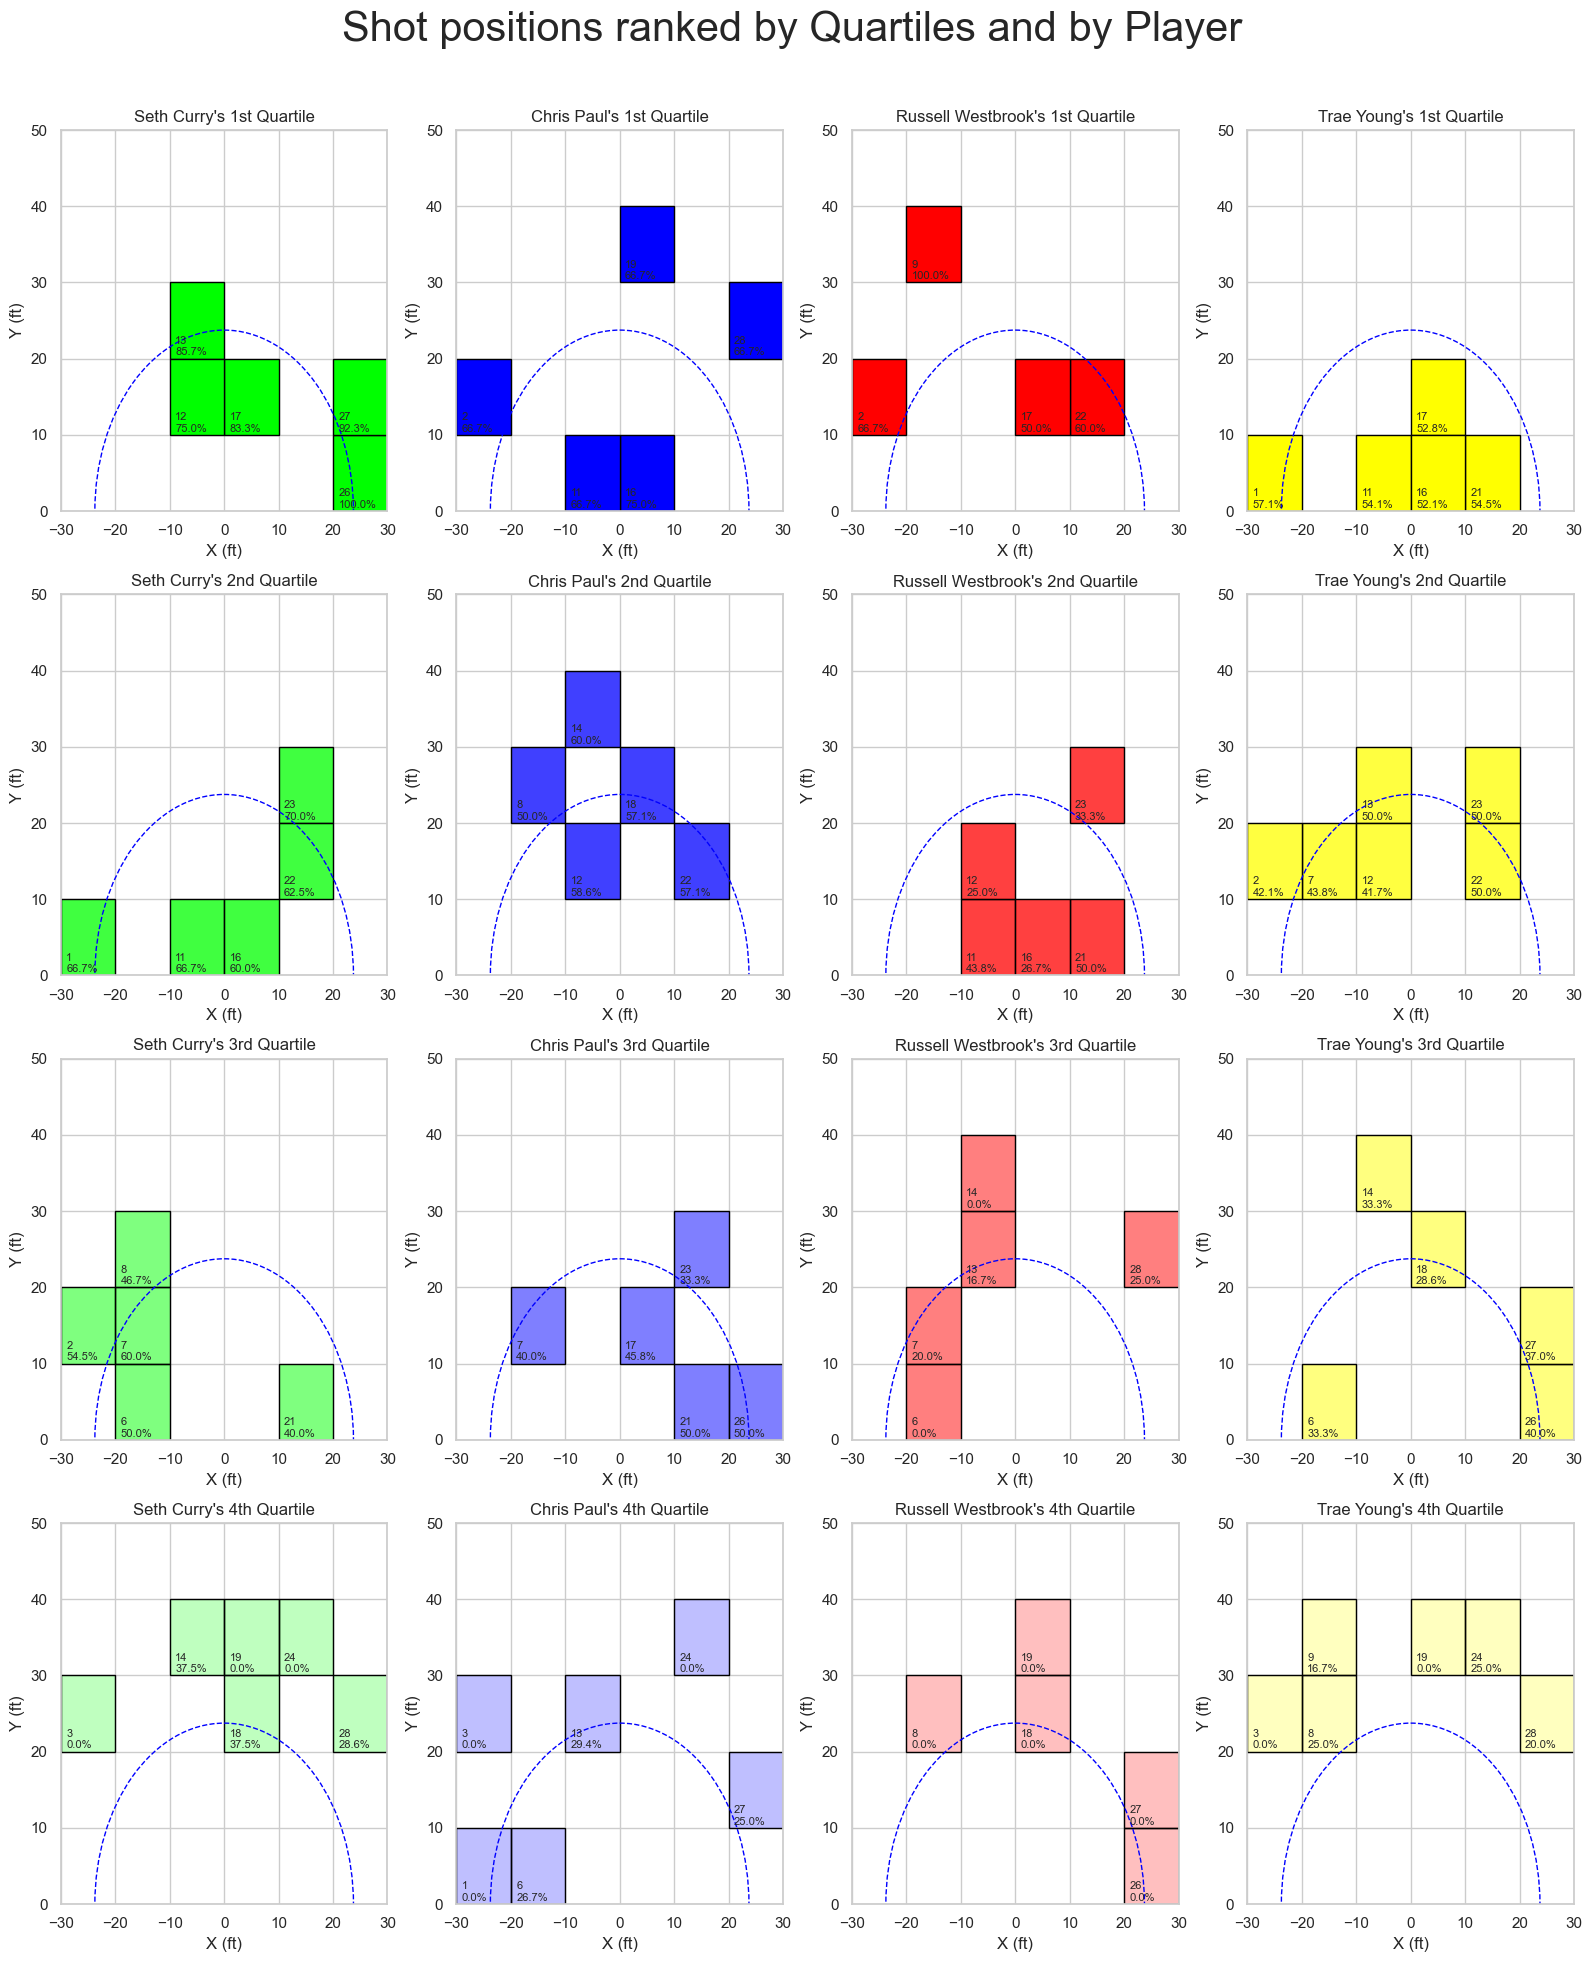

In [10]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(16, 20))
fig.suptitle('Shot positions ranked by Quartiles and by Player', fontsize=30)

for i, player in enumerate(players):
    player_data = quad_counts[quad_counts['SHOOTER'] == player]
    
    # Filter out quadrants where Y > 40 and there's no shot data
    player_data = player_data[(player_data['Y_BIN'] < 4) & ((player_data['MADE'] + player_data['MISSED']) > 0)]
    
    sorted_data = player_data.sort_values('SHOT%', ascending=False)
    
    # Calculate the quartile boundaries
    n_total = len(sorted_data)
    q1 = int(n_total * 0.25)
    q2 = int(n_total * 0.5)
    q3 = int(n_total * 0.75)
    
    # Select the four quartiles
    first_quartile = sorted_data.head(q1)
    second_quartile = sorted_data.iloc[q1:q2]
    third_quartile = sorted_data.iloc[q2:q3]
    fourth_quartile = sorted_data.tail(n_total - q3)
    
    # Plot the four quartiles for each player
    plot_quadrants(axes[0, i], first_quartile, f"{player}'s 1st Quartile", player_colors[player][0])
    plot_quadrants(axes[1, i], second_quartile, f"{player}'s 2nd Quartile", player_colors[player][1])
    plot_quadrants(axes[2, i], third_quartile, f"{player}'s 3rd Quartile", player_colors[player][2])
    plot_quadrants(axes[3, i], fourth_quartile, f"{player}'s 4th Quartile", player_colors[player][3])

# Optimize the layout and show the plot
fig.tight_layout()
fig.subplots_adjust(top=0.92)
plt.show()



## 4. Shot percentage vs. Range

Next, let's analyze shot percentage vs Range

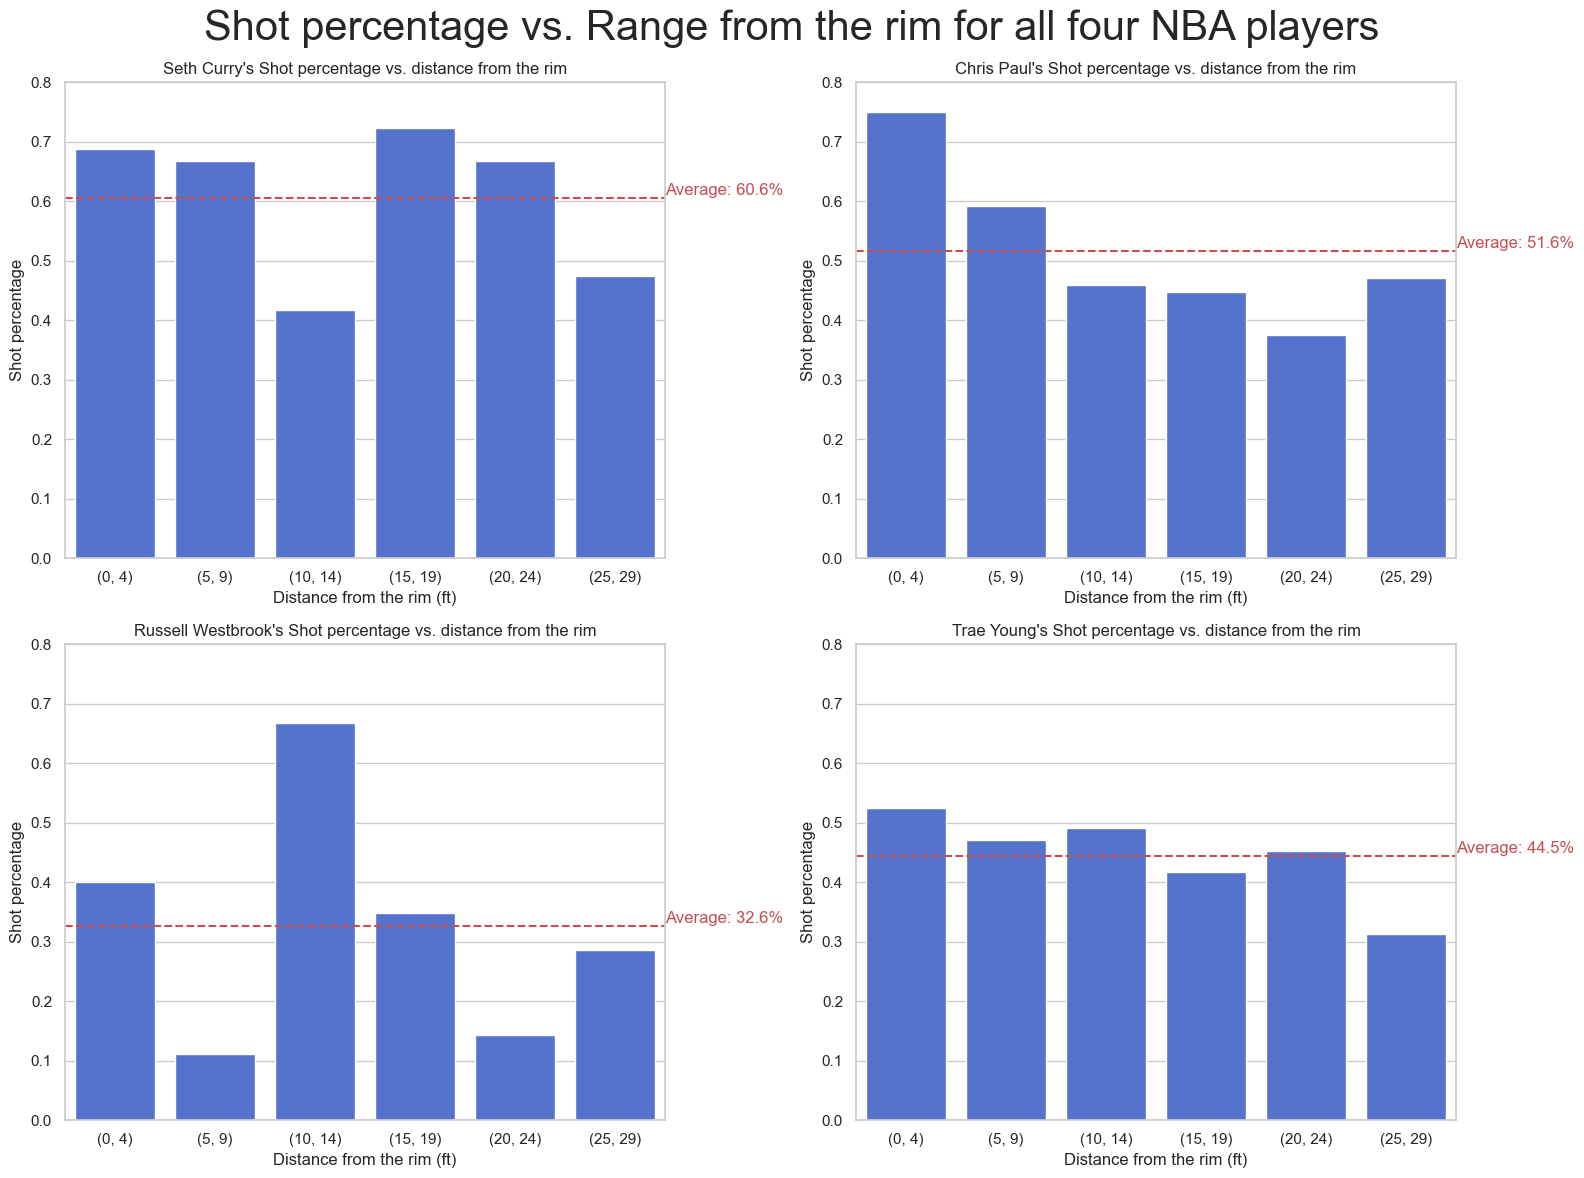

In [11]:
# Step 1: Calculate the shot percentage for each range and player
range_counts = data.pivot_table(index=['SHOOTER', 'RANGE'], columns='SCORE', values='DEFENDER', aggfunc='count').fillna(0)
range_counts['SHOT%'] = range_counts['MADE'] / (range_counts['MADE'] + range_counts['MISSED'])
range_counts.reset_index(inplace=True)


# Step 2: Create the plot
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))
fig.suptitle('Shot percentage vs. Range from the rim for all four NBA players', fontsize=30)

for i, ax in enumerate(axes.flat):
    player = players[i]
    player_data = range_counts[range_counts['SHOOTER'] == player]
    
    # Sort 'RANGE' column before plotting the barplot
    player_data = player_data.sort_values('RANGE', key=lambda x: x.str.extract('(\d+)')[0].astype(int))
    
    sns.barplot(x='RANGE', y='SHOT%', data=player_data, ax=ax, color="royalblue")
    
    # Set axis labels, title, and legend
    ax.set_xlabel('Distance from the rim (ft)')
    ax.set_ylabel('Shot percentage')
    ax.set_title(f"{player}'s Shot percentage vs. distance from the rim")

    # Set the y-axis limit for each subplot
    ax.set_ylim(0, 0.8)
    
    # Calculate the average shot percentage for the player
    avg_shot_percentage = player_data['SHOT%'].mean()
    
    # Add a horizontal reference line
    ax.axhline(y=avg_shot_percentage, color='r', linestyle='--')
    
    # Annotate the reference line
    ax.text(5.5, avg_shot_percentage + 0.005, f"Average: {avg_shot_percentage * 100:.1f}%", color='r', fontsize=12)

# Optimize the layout and show the plot
fig.tight_layout()
fig.subplots_adjust(top=0.92)
plt.show()



In [12]:
data.head()

,SHOOTER,X,Y,RANGE,DEFENDER,SCORE,X_BIN,Y_BIN
INDEX,,,,,,,,
0,Seth Curry,-3.808987,5.583621,"(0, 4)",Chris Paul,MADE,2,0
1,Seth Curry,-0.104279,5.919138,"(0, 4)",Trae Young,MADE,2,0
2,Seth Curry,-0.525864,8.912239,"(0, 4)",Trae Young,MADE,2,0
3,Seth Curry,-0.790616,7.503782,"(0, 4)",Chris Paul,MADE,2,0
4,Seth Curry,2.119074,5.320534,"(0, 4)",Trae Young,MADE,3,0


## 5. Effect of the Defender

For more granularity, we will plot shot percentage vs range for each shooter-defender combination.

In [13]:
# Add a unique identifier for each shot attempt
data['ATTEMPT_ID'] = data.index

# Step 1: Calculate the shot percentage for each range, player, and defender
range_counts = data.pivot_table(index=['SHOOTER', 'DEFENDER', 'RANGE'], columns='SCORE', values='ATTEMPT_ID', aggfunc='count').fillna(0)
range_counts['SHOT%'] = range_counts['MADE'] / (range_counts['MADE'] + range_counts['MISSED'])
range_counts.reset_index(inplace=True)




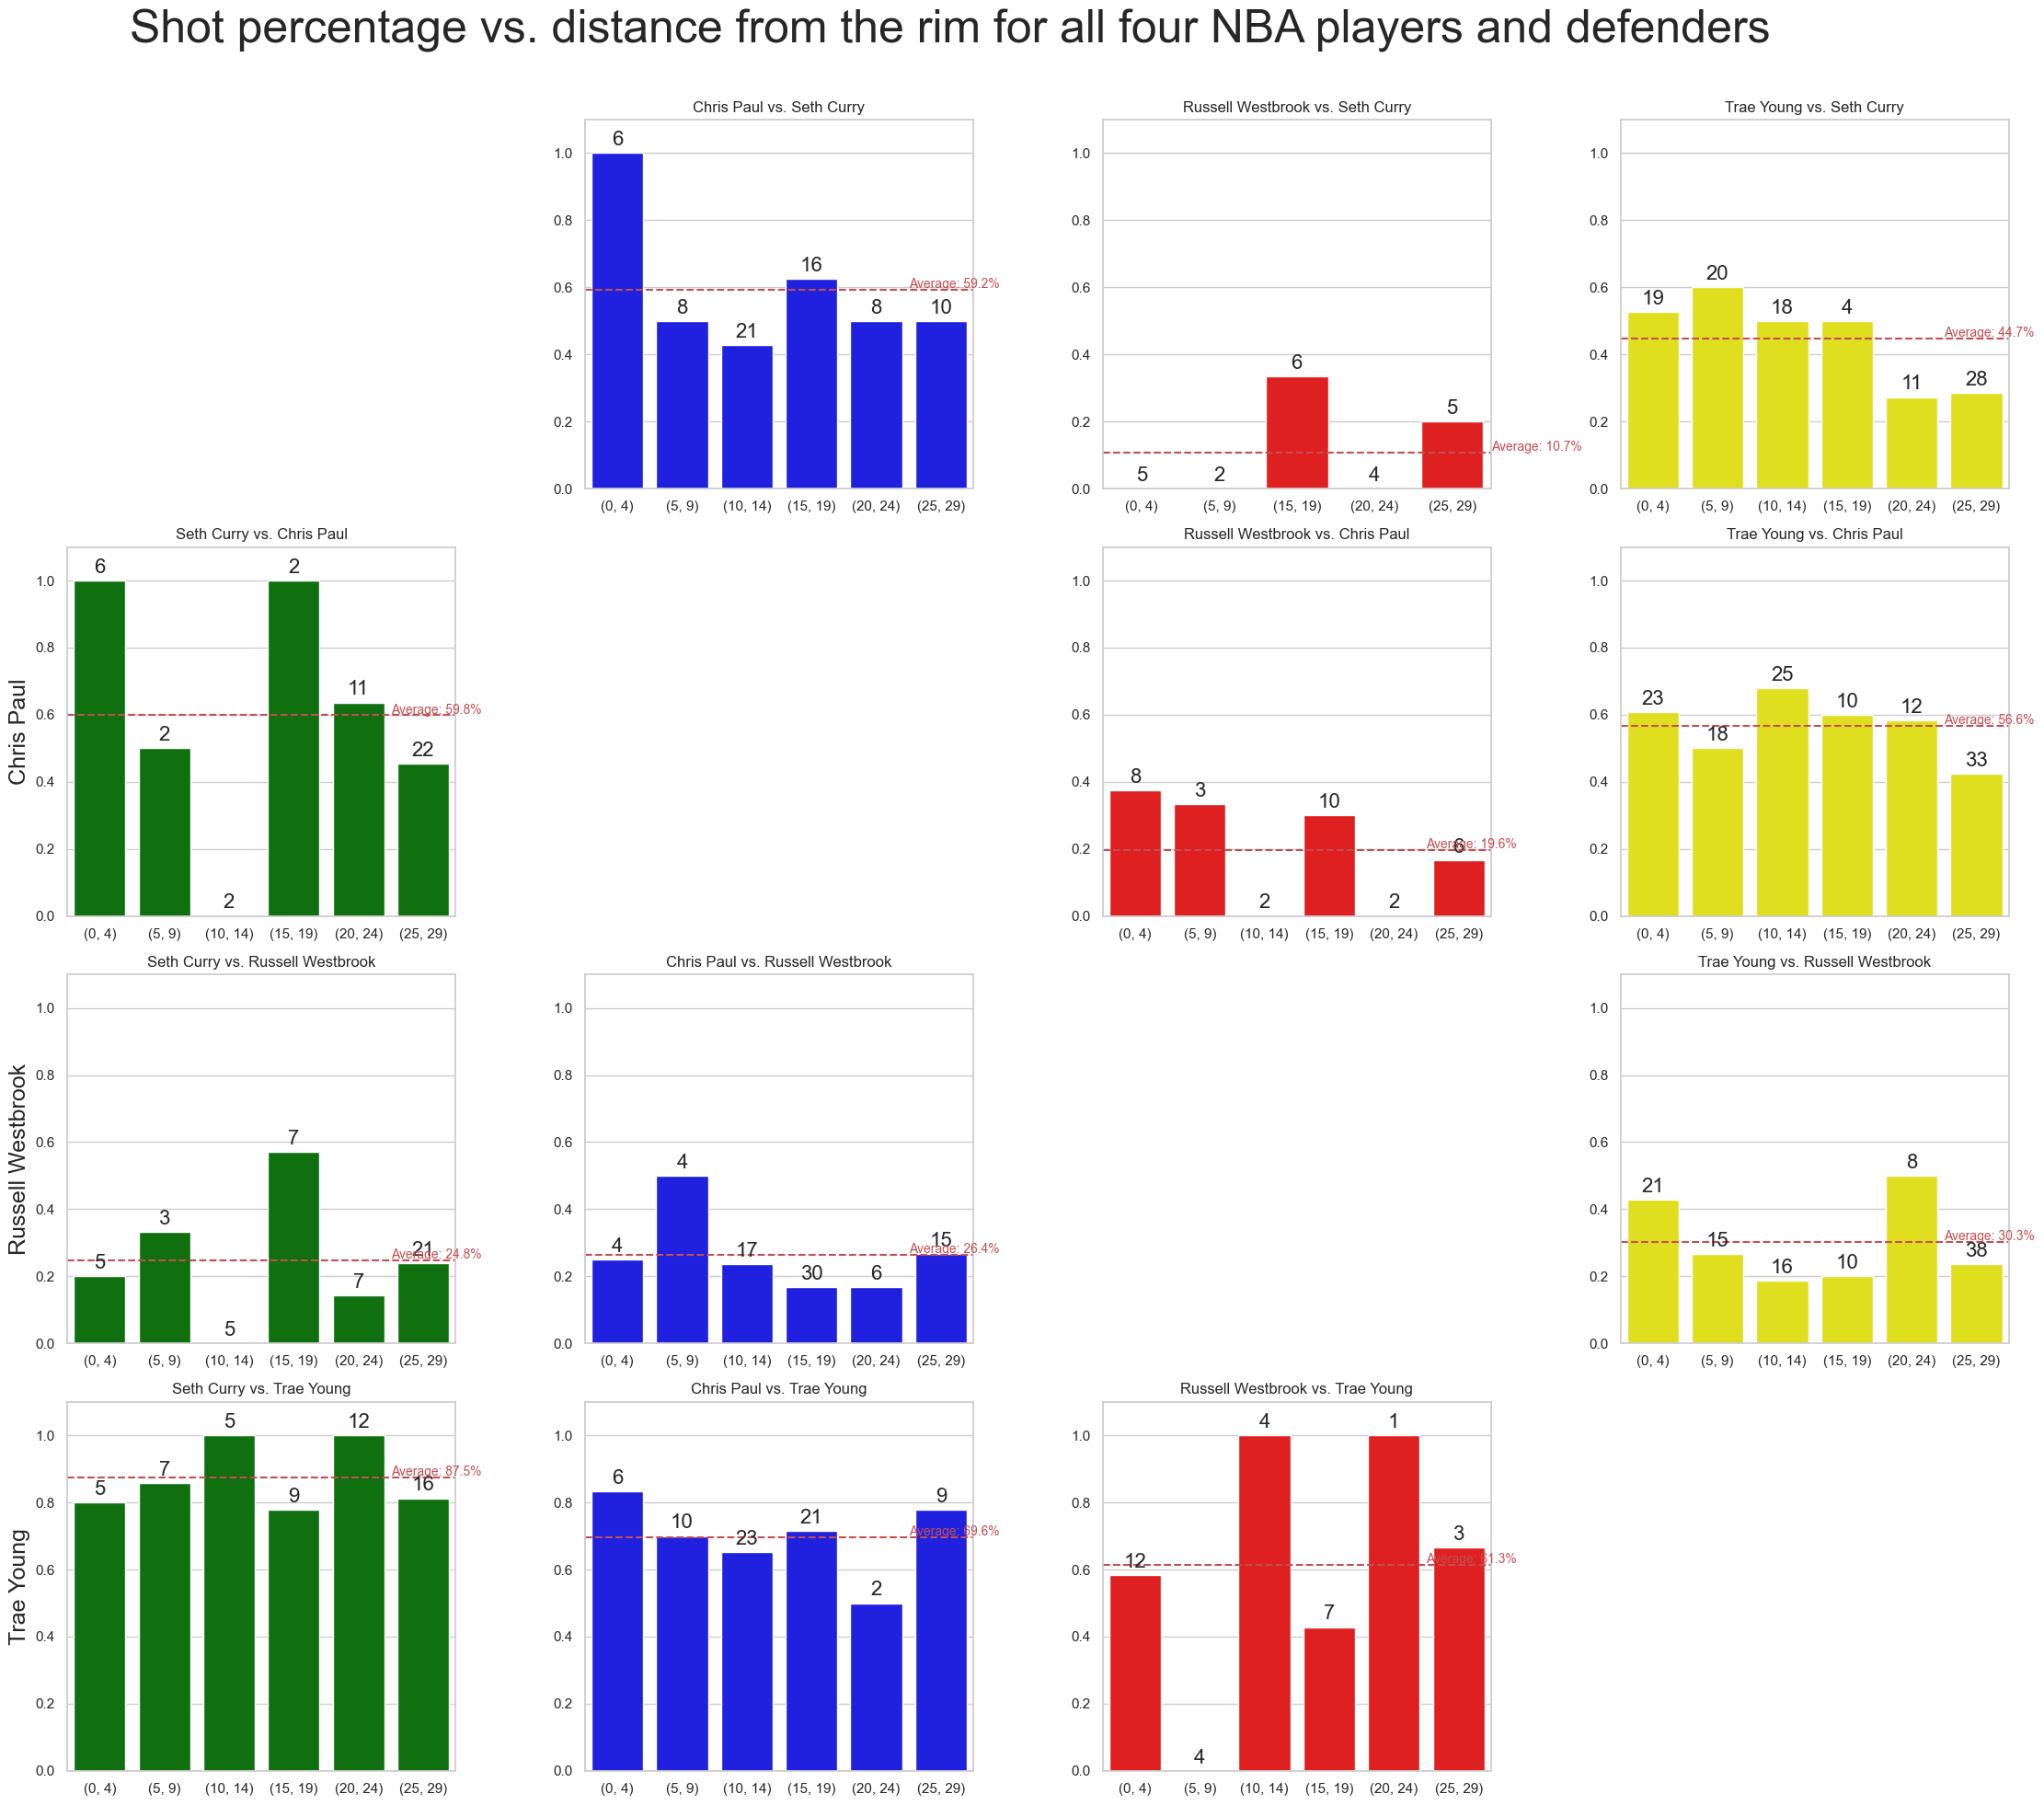

In [14]:
# Step 2: Create the plot
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(24, 20))
fig.suptitle('Shot percentage vs. distance from the rim for all four NBA players and defenders', fontsize=36)
player_colors = {'Seth Curry': 'green', 'Chris Paul': 'blue', 'Russell Westbrook': 'red', 'Trae Young': 'yellow'}

for shooter_idx, shooter in enumerate(players):
    for defender_idx, defender in enumerate(players):
        if shooter_idx == defender_idx:
            # Leave the diagonal empty
            axes[shooter_idx, defender_idx].axis('off')
            continue

        ax = axes[defender_idx, shooter_idx]
        player_data = range_counts[(range_counts['SHOOTER'] == shooter) & (range_counts['DEFENDER'] == defender)]

        # Sort 'RANGE' column before plotting the barplot
        player_data = player_data.sort_values('RANGE', key=lambda x: x.str.extract('(\d+)')[0].astype(int))

        bar_plot = sns.barplot(x='RANGE', y='SHOT%', data=player_data, ax=ax, color=player_colors[shooter])

        # Annotate bars with the number of attempts
        for i, p in enumerate(ax.patches):
            height = p.get_height()
            attempts = int(player_data.iloc[i]['MADE'] + player_data.iloc[i]['MISSED'])
            ax.annotate(f"{attempts}",
                        xy=(p.get_x() + p.get_width() / 2, height),
                        xytext=(0, 3),
                        textcoords="offset points",
                        ha='center', va='bottom', fontsize=16, rotation=0)

        # Set axis labels, title, and legend
        ax.set_xlabel('')
        ax.set_ylabel('')
        ax.set_ylim(0, 1.1)
        ax.set_title(f"{shooter} vs. {defender}")

        # Calculate the average shot percentage for the player
        avg_shot_percentage = player_data['SHOT%'].mean()

        # Add a horizontal reference line
        ax.axhline(y=avg_shot_percentage, color='r', linestyle='--')

        # Annotate the reference line
        ax.text(4.5, avg_shot_percentage + 0.005, f"Average: {avg_shot_percentage * 100:.1f}%", color='r', fontsize=10)

# Set shooter names as y-axis labels
for ax, shooter in zip(axes[:,0], players):
    ax.yaxis.set_label_position('left')
    ax.set_ylabel(shooter, fontsize=18)

# Optimize the layout and show the plot
fig.tight_layout()
fig.subplots_adjust(top=0.92, left=0.10)
plt.show()




We will produce a heatmap of shot percentage to compare player performance while facing different defenders. This will be a summary of the previous plot.

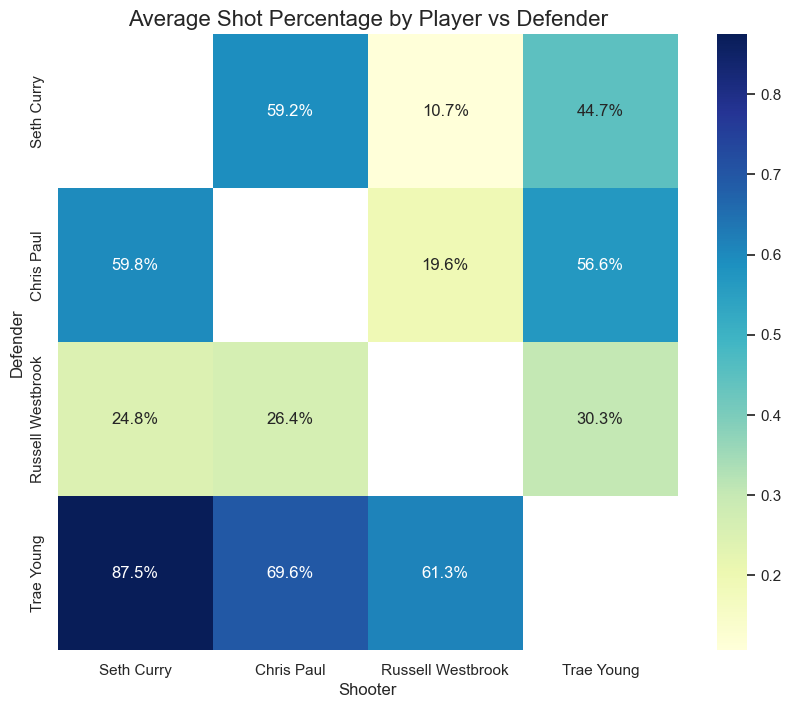

In [15]:
# Step 1: Calculate the average shot percentage for each player vs defender
avg_shot_percentage = range_counts.groupby(['SHOOTER', 'DEFENDER'])['SHOT%'].mean().reset_index()

# Sort by the specified order of shooters and defenders
shooter_order = ['Seth Curry', 'Chris Paul', 'Russell Westbrook', 'Trae Young']
defender_order = ['Seth Curry', 'Chris Paul', 'Russell Westbrook', 'Trae Young']

avg_shot_percentage['SHOOTER'] = pd.Categorical(avg_shot_percentage['SHOOTER'], categories=shooter_order, ordered=True)
avg_shot_percentage['DEFENDER'] = pd.Categorical(avg_shot_percentage['DEFENDER'], categories=defender_order, ordered=True)

avg_shot_percentage.sort_values(['SHOOTER', 'DEFENDER'], inplace=True)

# Step 2: Pivot the DataFrame to have the players as rows and defenders as columns
pivot_table = avg_shot_percentage.pivot('DEFENDER', 'SHOOTER', 'SHOT%')

# Step 3: Create the heatmap
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(pivot_table, annot=True, fmt=".1%", cmap="YlGnBu", ax=ax)

# Set axis labels and title
ax.set_xlabel('Shooter', fontsize=12)
ax.set_ylabel('Defender', fontsize=12)
ax.set_title('Average Shot Percentage by Player vs Defender', fontsize=16)

plt.show()





# III - Discussion

In light of the above visualizations, we can observe the following:

### Seth Curry
- Player average Shot % is 60.6%
- He achieved 59.8% against Paul, and an impressive 87.5% against Young. However, he only achiaved 24.8 % against Westbrook.
- Very good in general from behind the 3-point line. 
- Especially, a great 90+ % from the right corner. 
- Mid-range, near the free-throw line, seems to be a great sport for him as well.
- The 3-point shots facing the blackboard seem to be a great spot as well, with 85+% accuracy.
- 

These are excellent numbers for Steph's brother! 

### Chris Paul
- Player average Shot % is 51.6%
- He achieve 59+ % accuracy against Curry and Young. However, he only achieved 26.4 % against Westbrook.
- Impressive numbers for Chris Paul as well. Less impressive than Seth Paul though but still very good.
- Their best quadrants seem to be similar.
- The best spot for Chris Paul seems to be facing the board, with a 60+% accuracy. 
- Driving to the rim as well seems to be a good strategy for him, with 65+% under the rim. This is something Chris has always been good with. But as his careers progresses, he could be less and less good at it, relying more on his 3-point and mid-range shots.
- From a defensive perspective, Curry and Young were very effective against him with 50+% accuracy. Only Westbrook seems to have issues against him (but that is consistent with his offensive level against other PGs as well)


### Trae Young
- Player average Shot % is 44.6 %
- Trae Young's pattern seem to be a little different from Paul and Curry. His mid-Range shot seems to be more lethal than his 3-point shot (I had the impression he was as good as Seth... But I haven't seen a game in a while so...)
- He seems to be more at ease driving to the rim from the right side of the court.
- Quadrants 1,13 and 23 are also good spots for him, with 50-55% accuracy. However, he is not as good as Paul and Curry from that range.
- However, according to the dataset, Young's defense is very questionable. All players achieved 61+ % against him, which is very high given the other pont guards numbers.

### Russel Westbrook
- Player average Shot % is 32.6%
- One of my Best players of the last 15 years... It pained me to see this data visualization. Simply put, he is not as good as the other four players in general.
- Driving to the rim from the right side off the court seems to be best for him. 
- Note that Westbrook has the least datapoints of the datadet (see EDA)
- However (BIG However), Westbrook has one advantage according to the dataset. The best Point guard of the dataset achieves 30.3% when facing him, which can be a great advantage in a team given the level of the point guards currently. This could explain why he is still relevant in today's game. He probably makes less shot attempts (understandably), but keeps the opposite PGs under lockdown.



